<a href="https://colab.research.google.com/github/NoelleI/Pigmentation/blob/master/Smaller_Melanoma_with_CNN_with_Sigmoid_4_Pigmentation_rotate_flip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma with CNN

This analysis trains a neural network to perform segmentation on melanoma data and then applies the algorithm to segment a pigmentation lesion

This line clones the github repository so that data may be accessed and the file can be saved there

In [74]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


This mounts Google Drive to access the ~10G melanoma photo data sets

1.   List item
2.   List item



In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True) 

In [76]:
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import os
%matplotlib inline
# First, load the image
#dir_path = os.path.dirname(os.path.realpath(__file__))
filename = "./Pigmentation/pigmentation.png"

# Load the image
pigment_image = mpimg.imread(filename)

# Print out its shape
print(pigment_image.shape)


(689, 898, 3)


In [77]:
pwd

'/content'

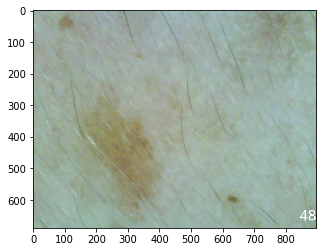

In [78]:
import matplotlib.pyplot as plt
plt.imshow(pigment_image)
plt.show()

In [79]:
pigment_image.shape

(689, 898, 3)

In [0]:
import skimage
pigment_image_resized = skimage.transform.resize(pigment_image, (96,128,3))


In [0]:
##note: in order to discern the melanin content, it will be necessary to understand how this resizing algorithm works: does it take a maximum value? What does it use?

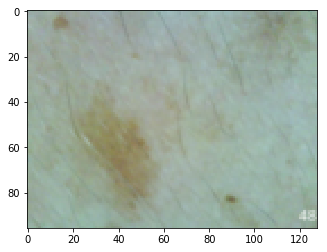

In [82]:
plt.imshow(pigment_image_resized)
plt.show()

In [83]:
type(pigment_image)

numpy.ndarray

In [0]:
import numpy as np
pigment_image_show = pigment_image_resized
pigment_image_resized = np.reshape(pigment_image_resized, [1,96,128,3])

In [85]:
import scipy
scipy.__version__

'1.0.0'

In [86]:
 pip install scipy==1.0.0

In [87]:
!pip install pillow

In [88]:
from scipy import ndimage, misc
import re
import os
#get pigmentation photos
pigs = []
for root, dirnames, filenames in os.walk("./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"): 
    for filename in filenames:
        if re.search('d*.PNG', filename):
            filepath = os.path.join(root, filename)
            pig = ndimage.imread(filepath)
            pig_resized = skimage.transform.resize(pig, (96,128,3))  #redo this size or re-size later in Tensorflow
            pigs.append(pig_resized)
            #filename = filename.split(".")
            #name = filename[0] + "2." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #misc.imsave(new_path, _seg_resized)
            #os.remove(filepath)
            #f.close()
pigs = np.array(pigs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [89]:
filenames 

['9--09-29-pm.PNG',
 '23--10-28-pm.PNG',
 '8--09-29-am.PNG',
 '5--09-27-pm.PNG',
 '7--09-28-pm.PNG',
 '14--10-10-am.PNG',
 '11--10-02-pm.PNG',
 '15--10-11-pm.PNG',
 '26--11-10-am.PNG',
 '27--11-11-pm.PNG',
 '18--10-14-am.PNG',
 '10--09-30-pm.PNG',
 '21--10-120-pm.PNG',
 '19--10-16-pm.PNG',
 '16--10-12-pm.PNG',
 '3--09-25-am.PNG',
 '25--11-06-pm.PNG',
 '4--09-25-pm.PNG',
 '0-0--09-22-pm.PNG',
 '1-1--09-23-am.PNG',
 '13--10-06-am.PNG',
 '20--10-18-pm.PNG',
 '6--09-28-am.PNG',
 '12--10-04-pm.PNG',
 '22--10-25-am.PNG',
 '17--10-13-am.PNG',
 '24--11-04-am.PNG',
 '2--09-23-pm.PNG']

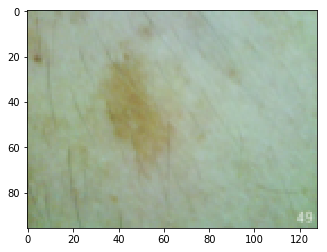

In [90]:
plt.imshow(pigs[0])


In [0]:
## I created a train-test split in the original upload of files to Google Docs, but I will merge these because I've realized that I can still use train-test split below and it will 
## randomize the photos each time

In [92]:

#there are 2594 photos
images = []
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Training_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = misc.imresize(image, (48,64,3))  #redo this size or re-size later in Tensorflow ->STORE resized images later
            images.append(image_resized)
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = misc.imresize(image, (48,64,3))  #redo this size or re-size later in Tensorflow ->STORE resized images later
            images.append(image_resized)            
            
            
            
images = np.array(images)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


In [93]:
images.shape

(7782, 48, 64, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


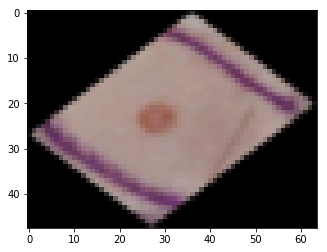

In [94]:
image = images[2580,:,:,:]
rotate_image = ndimage.rotate(image, 45)
rotate_image = misc.imresize(rotate_image, (48,64,3))
plt.imshow(rotate_image)
plt.show()

***The images look blurry***

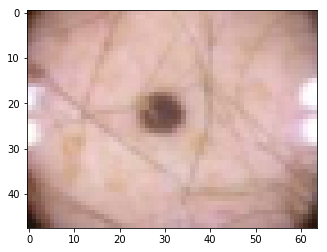

In [95]:
image = images[0,:,:,:]
plt.imshow(image)
plt.show()

In [96]:
filepath

'/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches/batch10/ISIC_0002673r.jpg'

In [97]:
image.shape

(48, 64, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


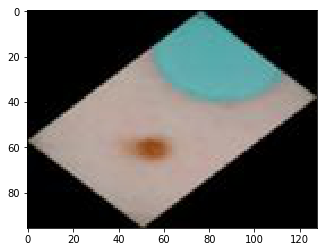

In [98]:
image = ndimage.imread(filepath, mode="RGB")
plt.imshow(image)
plt.show()

In [99]:
#C:/Users\Admin\Documents\Skin Depth\Leads and Projects\Melanoma Challenge\2018\ISIC2018_Task1_Training_GroundTruth\ISIC2018_Task1_Training_GroundTruth
segs = []
files = []
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"):  #"/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #C:/Users/Admin/Documents/Skin Depth/Leads and Projects/Melanoma Challenge/2018/ISIC2018_Task1_Training_GroundTruth/ISIC2018_Task1_Training_GroundTruth"): 
    for filename in filenames:
            files.append(filename)
            filepath = os.path.join(root, filename)
            seg = ndimage.imread(filepath, mode="L")
            seg_resized = misc.imresize(seg, (48,64,3))
            segs.append(seg_resized)
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Testing_GroundTruth_batches"):  #"/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #/content/gdrive/My Drive/ISIC2018_Task1_Training_GroundTruth (1).zip (Unzipped Files)/ISIC2018_Task1_Training_GroundTruth"): #C:/Users/Admin/Documents/Skin Depth/Leads and Projects/Melanoma Challenge/2018/ISIC2018_Task1_Training_GroundTruth/ISIC2018_Task1_Training_GroundTruth"): 
    for filename in filenames:
            files.append(filename)
            filepath = os.path.join(root, filename)
            seg = ndimage.imread(filepath, mode="L")
            seg_resized = misc.imresize(seg, (48,64,3))
            segs.append(seg_resized)   
segs = np.array(segs)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app


**Check some features of the data to be sure that it uploaded properly**

In [100]:
segs.shape


(7782, 48, 64)

In [101]:
segs[-1].shape

(48, 64)

In [102]:
images.shape

(7782, 48, 64, 3)

In [103]:
filename = filenames[3]
filepath = os.path.join(root, filename)
seg = ndimage.imread(filepath, mode="L")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
seg.shape

(96, 128)

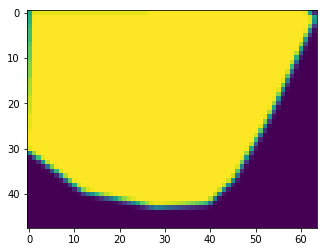

In [105]:
image = segs[2593,:,:]
plt.imshow(image)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


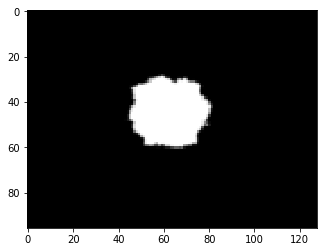

In [106]:
image = image = ndimage.imread(filepath, mode="RGB")
plt.imshow(image)
plt.show()

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [0]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.3) #this is randomized each time the program is started and run from scratch

In [108]:
trainim.shape

(5447, 48, 64, 3)

In [109]:
np.max(testlab)

255

In [110]:
testlab.shape

(2335, 48, 64)

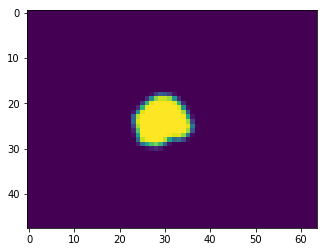

In [111]:
image = trainlab[5,:,:]
plt.imshow(image)
plt.show()

In [0]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        ###Not Needed####
        # Vertically stacks the training images
        #self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])  #insert images here, make sure they are 
        #vetically stacked##
        #train_len = len(self.training_images)
        
        # Reshapes and normalizes training images
        self.training_images = trainim/255   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the training labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        
        ##May need to replace this with code that rounds a humber to 0 or 1 for the mask ##
        self.training_labels = np.around(trainlab/255) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        # Vertically stacks the test images
        #self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        #test_len = len(self.test_images)
        
        # Reshapes and normalizes test images
        self.test_images = testim/255 #self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the test labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = np.around(testlab/255).reshape(-1,48*64) #one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100 - this is now a mistake
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<batch_size and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3)  #why is this necessary?
            y = np.vstack((self.training_labels[self.i:self.i+batch_size].reshape(-1,48*64), self.training_labels[0:xtra].reshape(-1,48*64)))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3)  #why is this necessary?
            y = self.training_labels[self.i:self.i+batch_size].reshape(-1,48*64)
        
        self.i = xtra 
        return x, y

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def deconv2d(x, shape):
    return tf.layers.conv2d_transpose(x, shape[3], shape[0:2])

Create a max pooling layer, again using built in TF functions:

Performs the max pooling on the input.

    Args:
      value: A 4-D `Tensor` with shape `[batch, height, width, channels]` and
        type `tf.float32`.
      ksize: A list of ints that has length >= 4.  The size of the window for
        each dimension of the input tensor.
      strides: A list of ints that has length >= 4.  The stride of the sliding
        window for each dimension of the input tensor.
      padding: A string, either `'VALID'` or `'SAME'`. 

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [0]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

This is a normal fully connected layer

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
def deconvolutional_layer(input_x, shape):
    #W = init_weights(shape)
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    return tf.nn.relu(deconv2d(input_x, shape) +b)

### Placeholders

In [0]:
x = tf.placeholder(tf.float32,shape=[None,48,64,3])  #trace the shaping of these through the code...


In [0]:
y_true = tf.placeholder(tf.float32,shape=[None,48*64])  #this now has every pixel in the ground truth segmentation

### Layers

In [0]:
x_image = tf.reshape(x,[-1,48,64,3])  #-1 infers the shape of the first dimension (here, the batch size)

In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,3,16])
convo_1_pooling = max_pool_2by2(convo_1)

In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,16,16])
convo_2_pooling = max_pool_2by2(convo_2)

In [0]:
#print(convo_2_pooling.shape)

In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
## You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2,shape=[3,3,16,32])
convo_3_pooling = max_pool_2by2(convo_3)

In [128]:
print(convo_3_pooling.shape)

(?, 12, 16, 32)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_4 = convolutional_layer(convo_3_pooling,shape=[3,3,32,64])
#convo_4_pooling = max_pool_2by2(convo_4)

In [0]:
#print(convo_4_pooling.shape)

In [0]:
#convo_5 = convolutional_layer(convo_4,shape=[3,3,64,128])
#convo_5_pooling = max_pool_2by2(convo_5)

In [132]:
print(convo_4.shape)

(?, 12, 16, 64)


In [0]:
#convo_6 = convolutional_layer(convo_5,shape=[3,3,128,256])
#convo_6_pooling = max_pool_2by2(convo_6)

In [0]:
#print(convo_6.shape)

In [0]:
deconv_4 = deconvolutional_layer(convo_4, shape = [3,3,64,32])

In [136]:
deconv_4.shape


TensorShape([Dimension(None), Dimension(14), Dimension(18), Dimension(32)])

In [0]:
# Why 7 by 7 image? Because we did 2 pooling layers, so (28/2)/2 = 7
# 64 then just comes from the output of the previous Convolution
deconvo_4_flat = tf.reshape(deconv_4,[-1,14*18*32])
full_layer_one = tf.nn.relu(normal_full_layer(deconvo_4_flat,48*64))

In [138]:
print(full_layer_one.shape)


(?, 3072)


In [0]:
# NOTE THE PLACEHOLDER HERE!
hold_prob = tf.placeholder(tf.float32)

full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [0]:
#full_layer_two = tf.nn.relu(normal_full_layer(full_one_dropout,96*128))


In [0]:
#full_layer_three = tf.nn.relu(normal_full_layer(full_layer_two,192*256))


deconv_layer_one = 

## Augment the output with a direct connection to the input photo

#do not use for now

flat_in = tf.reshape(x,[-1,1764])
aug = tf.concat([flat_in, full_one_dropout], axis = 1)
print(flat_in.shape)
print(full_one_dropout.shape)
print(aug.shape)
##need to think about how to concatenate these


full_one_plus_in = tf.convert_to_tensor(aug, dtype=tf.float32)

type(full_one_dropout)

In [0]:
y_pred = normal_full_layer(full_one_dropout, 48*64)

### Loss Function

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred))

This will be updated to a loss function based on the jaccard index, as in the related publication

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
train = optimizer.minimize(cross_entropy)   #can this be done for each pixel?

### Intialize Variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

### Session

In [145]:
mel = MelHelper()
mel.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [147]:
steps = 10001
import time
batch_size = 1

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    print("starting init")
    sess.run(init)
    print("done init")
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        #print(i)
        #print("\n")
        
        #print("batch training labels shape is ", batch_y.shape)
        #print("batch training labels type is ", batch_y.dtype)
        #print("batch training labels are ", batch_y)
        #print("batch training data are ", batch_x)
        #image = batch_y.reshape(-1,21,28)[5,:,:]
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        #print("batch training prediction are ", batch_y)
        #image_pred = sess.run(y_pred,feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0} ).reshape(-1,21,28)[5,:,:]
        #image_pred = np.round(1/(1 + np.exp(-image_pred)))
        
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print("the time is ", time.clock() - start_time, "\n")
             #print("mel i is ", mel.i)
             #plt.imshow(image)
             #plt.show()
             #plt.imshow(image_pred)
             #plt.show()
            
            #print('Currently on step {}'.format(i))
            #print('Accuracy is:')
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            #acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            pred = tf.round(1/(1 + tf.exp(-tf.reshape(y_pred, [-1,48,64]))))
            true = tf.reshape(y_true, [-1,48,64])
          
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))  ###REPLACE THIS LINE TO INCLUDE JACARD INDEX####
            #y_pred = tf.round(y_pred)
            #y_true = tf.round(y_true)
            
            intersect = tf.reduce_sum(tf.cast(true*pred, tf.float32), axis = [1,2])
            union = tf.reduce_sum(tf.cast(pred, tf.float32), axis = [1,2]) + tf.reduce_sum(tf.cast(true, tf.float32), axis = [1,2]) - intersect  #think this has an error
            jacc = intersect/union
            #acc = tf.reduce_mean(tf.cast(intersect,tf.float32))
            #print("test labels shape is ", mel.test_labels.shape)
            #print("\n")
            
            print('Avg Jacc is:')
            J_out = sess.run([jacc, pred],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})
            print(np.sum(J_out[0])/J_out[0].shape[0], " step number is ",  i, " batch_size is ", batch_size)
            #if i == 500:
                #batch_size = 20
            #if i == 25000:
                #batch_size = 200
            
            #print out Jacc for training set and test set, Save Jacc and entropy to variable,
            #print out step number
            
            #use larger pics
            #print out and analyse cross entropy
            #run with full training batch for several iterations
            #pred = sess.run(pred,feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})
            
        if i == steps - 1:
            
            pred_pigment = sess.run([pred],feed_dict={x:pigs,hold_prob:1.0})
            
        #save_path = saver.save(sess, "./model.ckpt")

starting init
done init
Currently on step 0
the time is  0.44241199999999026 

Avg Jacc is:
0.13284467742070397  step number is  0  batch_size is  1
Currently on step 100
the time is  45.028701999999996 

Avg Jacc is:
0.2706463505420236  step number is  100  batch_size is  1
Currently on step 200
the time is  88.61935999999999 

Avg Jacc is:
0.31131011505453693  step number is  200  batch_size is  1
Currently on step 300
the time is  137.55121400000002 

Avg Jacc is:
0.37825203677061026  step number is  300  batch_size is  1
Currently on step 400
the time is  181.767969 

Avg Jacc is:
0.3353967572688035  step number is  400  batch_size is  1
Currently on step 500
the time is  226.30053100000003 

Avg Jacc is:
0.3586025589283324  step number is  500  batch_size is  1
Currently on step 600
the time is  270.279895 

Avg Jacc is:
0.3786288602449143  step number is  600  batch_size is  1
Currently on step 700
the time is  314.57459800000004 

Avg Jacc is:
0.3739013149089936  step number is 

KeyboardInterrupt: ignored

## Great Job!

In [0]:
plt.imshow(pred_pigment[0][5,:,:])
plt.show()

In [0]:
pigs.shape

In [0]:
pred_pigment[0].shape

In [0]:
plt.imshow(pigment_image_show)
plt.show()

In [0]:
mask = np.zeros([21,28,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
mask[:,:,0] = pred_pigment[0][0,:,:]
mask[:,:,1] = pred_pigment[0][0,:,:]
mask[:,:,2] = pred_pigment[0][0,:,:]
#mask = 1-mask
#mask = mask.astype(int)

image = pigment_image_show
#image[mask] = 0
image2 = image*mask*255
image1 = image*(1- mask)*255


In [0]:
plt.imshow(image2)
plt.show()

In [0]:
plt.imshow(image1)
plt.show()

In [0]:
image2[:,:,0].shape

In [0]:
red = image2[:,:,0].reshape(-1)

In [0]:
plt.hist(red, bins = 500, range = (0.1, red.max()))

In [0]:
plt.show()

In [0]:
a2 = np.average(red, weights = mask[:,:,0].reshape(-1))

In [0]:
a2

In [0]:
mask[0].shape

In [0]:
red_norm = image1[:,:,0].reshape(-1)

In [0]:
plt.hist(red_norm, bins = 500, range = (0.1, red_norm.max()))

In [0]:
plt.show()

In [0]:
mask_inv = 1-mask

In [0]:
a1 = np.average(red_norm, weights =mask_inv[:,:,0].reshape(-1))

In [0]:
mask_inv.shape

In [0]:
a1

In [0]:
a1 - a2

In [0]:
blue = image2[:,:,2].reshape(-1)

In [0]:
blue_norm = image1[:,:,2].reshape(-1)

In [0]:
plt.hist(blue, bins = 500, range = (0.1, blue.max()))
plt.show()

In [0]:
plt.hist(blue_norm, bins = 500, range = (0.1, blue_norm.max()))
plt.figure()
plt.show()

In [0]:
def measure_progress(pigs,masks):
    blue_pigs = []
    blue_norms = []
    imagesp = []
    imagesn = []
    i = 0
    for pig in pigs:
        mask = np.zeros([21,28,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
        mask[:,:,0] = pred_pigment[0][i,:,:]
        mask[:,:,1] = pred_pigment[0][i,:,:]
        mask[:,:,2] = pred_pigment[0][i,:,:]
        mask_inv = 1- mask
        imagep = pig*mask*255
        imagen = pig*(1- mask)*255
        imagesp += [imagep]
        imagesn += [imagen]
        blue_norm = imagen[:,:,2].reshape(-1)
        blue_pig = imagep[:,:,2].reshape(-1)
        an = np.average(blue_norm, weights =mask_inv[:,:,2].reshape(-1))
        ap = np.average(blue_pig, weights =mask[:,:,2].reshape(-1))
        blue_pigs += [ap]
        blue_norms += [an]
        i+=1
    blue_pigs = np.array(blue_pigs)
    blue_norms = np.array(blue_norms)
    return(blue_pigs, blue_norms, imagesp, imagesn)

In [0]:
pigmented, normal, imagesp, imagesn = measure_progress(pigs,pred_pigment)

In [0]:
J_out[1].shape

In [0]:
pigmented

In [0]:
normal

In [0]:
plt.plot(normal - pigmented)

In [0]:
plt.plot(normal)

In [0]:
plt.plot(pigmented)

In [0]:
plt.imshow(imagesp[0])

In [0]:
plt.imshow(imagesp[1])

In [0]:
plt.imshow(imagesp[2])

In [0]:
plt.imshow(imagesp[3])

In [0]:
plt.imshow(imagesp[4])

In [0]:
plt.imshow(imagesp[5])

In [0]:
plt.imshow(imagesp[6])

In [0]:
plt.imshow(imagesp[7])

In [0]:
plt.imshow(imagesp[8])

In [0]:
plt.imshow(imagesp[9])

In [0]:
plt.imshow(imagesp[10])

In [0]:
pigmented[0]

In [0]:
pigmented[10]

In [0]:
plt.imshow(imagesp[0])

In [0]:
plt.imshow(imagesp[11])

In [0]:
plt.imshow(imagesp[12])

In [0]:
plt.imshow(imagesp[13])

In [0]:
plt.imshow(imagesp[14])

In [0]:
plt.imshow(imagesp[15])

In [0]:
plt.imshow(imagesp[16])

In [0]:
plt.imshow(imagesp[17])

In [0]:
plt.imshow(imagesp[18])

In [0]:
plt.imshow(imagesp[19])

In [0]:
plt.imshow(imagesp[20])

In [0]:
plt.imshow(imagesp[21])

In [0]:
plt.imshow(imagesp[22])

In [0]:
plt.imshow(imagesp[23])

In [0]:
plt.imshow(imagesp[24])

In [0]:
plt.imshow(imagesp[25])

In [0]:
plt.imshow(imagesp[26])

In [0]:
plt.imshow(imagesp[27])

In [0]:
plt.imshow(imagesp[0])

In [0]:
test = normal - pigmented

In [0]:
test = np.hstack([test[0:2], test[4:8], test[9:21], test[22:26], test[27]])

In [0]:
plt.plot(test)

In [0]:
filenames

In [0]:
normal = np.hstack([normal[0:2], normal[12], normal[21:28], normal[2:12], normal[13:20]])

In [0]:
pigmented = np.hstack([pigmented[0:2], pigmented[12], pigmented[21:28], pigmented[2:12], pigmented[13:20]])

In [0]:
plt.plot(normal-pigmented)

In [0]:
## 26, 21, 2, 3, 8 -> 8,3,10,11,16

In [0]:
normal.shape

In [0]:
normal = np.hstack([normal[0:3], normal[4:8], normal[9], normal[12:16], normal[17:27]])

In [0]:
pigmented = np.hstack([pigmented[0:3], pigmented[4:8], pigmented[9], pigmented[12:16], pigmented[17:27]])

In [0]:
new_files_names = np.hstack([filenames[0:3], filenames[4:8], filenames[9], filenames[12:16], filenames[17:27]])

In [0]:
plt.plot(normal-pigmented)

In [0]:
plt.plot(pigmented)

In [0]:
plt.plot(normal)

In [0]:
plt.plot(pigmented/normal)

In [0]:
plt.plot((normal - pigmented)/normal)

In [0]:
new_files_names

In [0]:
plt.imshow(imagesp[12])